In [2]:
from pyspark.sql.functions import *
from pyspark.sql.types import *
from pyspark.sql import SparkSession


In [3]:
spark = (
    SparkSession.builder\
    .appName("Spark")\
    .master("local")\
    .getOrCreate()
)

In [4]:
df = spark.read.csv("trips_data.csv", header=True, inferSchema=True)

In [5]:
df.count()

212

In [6]:
df =df.drop(col("Dropoff Lat"),col("Dropoff Lng"), col("Begin Trip Lat"),col("Begin Trip Lng") )

In [7]:
df = df.withColumnRenamed("City","Cidade").withColumnRenamed("Product Type","Produto").withColumnRenamed("Trip or Order Status","Status_corrida").withColumnRenamed("Request Time","Request Time")\
    .withColumnRenamed("Begin Trip Time","Inicio_corrida").withColumnRenamed("Begin Trip Address","Origem").withColumnRenamed("Dropoff Time","Hora_finalizada").withColumnRenamed("Dropoff Address","Destino")\
    .withColumnRenamed("Distance (miles)","Distancia_milhas").withColumnRenamed("Fare Amount","Preco").withColumnRenamed("Fare Currency","Moeda")

In [8]:
df =df.withColumn("Preco", col("Preco").cast(FloatType()))

In [9]:
df.show(truncate=False)

+---------+-------+--------------+-----------------------------+-----------------------------+----------------------------------------------------------------------------------+-----------------------------+--------------------------------------------------------------------------------------+----------------+-----+-----+
|Cidade   |Produto|Status_corrida|Request Time                 |Inicio_corrida               |Origem                                                                            |Hora_finalizada              |Destino                                                                               |Distancia_milhas|Preco|Moeda|
+---------+-------+--------------+-----------------------------+-----------------------------+----------------------------------------------------------------------------------+-----------------------------+--------------------------------------------------------------------------------------+----------------+-----+-----+
|Sao Paulo|UberX  |COMPLETED

In [10]:
df.groupBy("Cidade").agg(count("*").alias("Quantidade_cidade")).show(truncate=False)

+--------------+-----------------+
|Cidade        |Quantidade_cidade|
+--------------+-----------------+
|Santos        |2                |
|Sao Paulo     |178              |
|Brasilia      |2                |
|Rio de Janeiro|30               |
+--------------+-----------------+



In [ ]:
df.filter(col('Cidade')=="Rio de Janeiro").orderBy("Request Time").show(30, truncate=False)

In [12]:
df.filter(col('Cidade')=="Brasilia").orderBy("Request Time").show(30, truncate=False)

+--------+-----------+--------------+-----------------------------+-----------------------------+-------------------------------------------------------------------------+-----------------------------+-------------------------------------------------------------------------+----------------+-----+-----+
|Cidade  |Produto    |Status_corrida|Request Time                 |Inicio_corrida               |Origem                                                                   |Hora_finalizada              |Destino                                                                  |Distancia_milhas|Preco|Moeda|
+--------+-----------+--------------+-----------------------------+-----------------------------+-------------------------------------------------------------------------+-----------------------------+-------------------------------------------------------------------------+----------------+-----+-----+
|Brasilia|UberX      |COMPLETED     |2021-01-30 19:05:47 +0000 UTC|2021-01-30 19:08:0

In [13]:
df_cancel = df.filter(col("Status_corrida")!="COMPLETED")


In [39]:
df_cancel.show()
df_cancel.count()

+--------------+-------+---------------+--------------------+--------------------+--------------------+--------------------+--------------------+----------------+-----+-----+
|        Cidade|Produto| Status_corrida|        Request Time|      Inicio_corrida|              Origem|     Hora_finalizada|             Destino|Distancia_milhas|Preco|Moeda|
+--------------+-------+---------------+--------------------+--------------------+--------------------+--------------------+--------------------+----------------+-----+-----+
|     Sao Paulo|  UberX|       CANCELED|2022-02-09 12:50:...|1970-01-01 00:00:...|R. Leonilda, 383 ...|1970-01-01 00:00:...|Rua Teresópolis, ...|             0.0|  0.0|  BRL|
|     Sao Paulo|  UberX|       CANCELED|2022-02-09 12:35:...|1970-01-01 00:00:...|Largo Santo Antôn...|1970-01-01 00:00:...|Rua das Maravilha...|             0.0|  0.0|  BRL|
|     Sao Paulo|  UberX|       CANCELED|2021-07-24 16:58:...|1970-01-01 00:00:...|Rua Senador Filin...|1970-01-01 00:00:...|R

18

In [14]:
df = df.filter(col("Status_corrida")=="COMPLETED")

In [15]:
df.printSchema()

root
 |-- Cidade: string (nullable = true)
 |-- Produto: string (nullable = true)
 |-- Status_corrida: string (nullable = true)
 |-- Request Time: string (nullable = true)
 |-- Inicio_corrida: string (nullable = true)
 |-- Origem: string (nullable = true)
 |-- Hora_finalizada: string (nullable = true)
 |-- Destino: string (nullable = true)
 |-- Distancia_milhas: double (nullable = true)
 |-- Preco: float (nullable = true)
 |-- Moeda: string (nullable = true)



In [16]:
gasto_total = df.agg({'Preco': 'sum'})
gasto_total = gasto_total.withColumn("sum(Preco)", format_number(round(col("sum(Preco)"),2),2))
gasto_total.show()

+----------+
|sum(Preco)|
+----------+
|  4,891.72|
+----------+



In [17]:
df.agg({'Preco': 'max'}).show()

+----------+
|max(Preco)|
+----------+
|     93.05|
+----------+



In [18]:
df.filter(col("Preco")>93.04).show(truncate=False)

+---------+-------+--------------+-----------------------------+-----------------------------+---------------------------------------------------------------------------------------+-----------------------------+-----------------------------------------------------------------------------------+----------------+-----+-----+
|Cidade   |Produto|Status_corrida|Request Time                 |Inicio_corrida               |Origem                                                                                 |Hora_finalizada              |Destino                                                                            |Distancia_milhas|Preco|Moeda|
+---------+-------+--------------+-----------------------------+-----------------------------+---------------------------------------------------------------------------------------+-----------------------------+-----------------------------------------------------------------------------------+----------------+-----+-----+
|Sao Paulo|UberX  |COM

In [19]:
df.orderBy("Distancia_milhas").show(truncate=False)

+--------------+-------+--------------+-----------------------------+-----------------------------+----------------------------------------------------------------------------------------------------+-----------------------------+------------------------------------------------------------------------------------------------------------+----------------+-----+-----+
|Cidade        |Produto|Status_corrida|Request Time                 |Inicio_corrida               |Origem                                                                                              |Hora_finalizada              |Destino                                                                                                     |Distancia_milhas|Preco|Moeda|
+--------------+-------+--------------+-----------------------------+-----------------------------+----------------------------------------------------------------------------------------------------+-----------------------------+--------------------------------

In [20]:
df.agg({'Distancia_milhas': 'max'}).show()

+---------------------+
|max(Distancia_milhas)|
+---------------------+
|                 31.8|
+---------------------+



In [21]:
df.filter(col('Distancia_milhas')>31.7).show()

+---------+-------+--------------+--------------------+--------------------+--------------------+--------------------+--------------------+----------------+-----+-----+
|   Cidade|Produto|Status_corrida|        Request Time|      Inicio_corrida|              Origem|     Hora_finalizada|             Destino|Distancia_milhas|Preco|Moeda|
+---------+-------+--------------+--------------------+--------------------+--------------------+--------------------+--------------------+----------------+-----+-----+
|Sao Paulo|  UberX|     COMPLETED|2018-11-16 17:47:...|2018-11-16 17:49:...|Praça Comandante ...|2018-11-16 18:54:...|R. Lourenço Leite...|            31.8|83.87|  BRL|
+---------+-------+--------------+--------------------+--------------------+--------------------+--------------------+--------------------+----------------+-----+-----+



In [22]:
df.agg({'Distancia_milhas': 'min'}).show()

+---------------------+
|min(Distancia_milhas)|
+---------------------+
|                 0.01|
+---------------------+



In [24]:
df.filter(col('Distancia_milhas')<0.02).show()

+--------------+-------+--------------+--------------------+--------------------+--------------------+--------------------+--------------------+----------------+-----+-----+
|        Cidade|Produto|Status_corrida|        Request Time|      Inicio_corrida|              Origem|     Hora_finalizada|             Destino|Distancia_milhas|Preco|Moeda|
+--------------+-------+--------------+--------------------+--------------------+--------------------+--------------------+--------------------+----------------+-----+-----+
|Rio de Janeiro|  uberX|     COMPLETED|2018-03-12 00:33:...|2018-03-12 00:36:...|R. Antônio Parrei...|2018-03-12 00:54:...|Rodoviária Novo R...|            0.01| 7.75|  BRL|
+--------------+-------+--------------+--------------------+--------------------+--------------------+--------------------+--------------------+----------------+-----+-----+



In [27]:
ano = udf(lambda data: data.split('-')[0])

In [29]:
df = df.withColumn("Ano", ano('Request Time'))

In [30]:
df.show()

+---------+-------+--------------+--------------------+--------------------+--------------------+--------------------+--------------------+----------------+-----+-----+----+
|   Cidade|Produto|Status_corrida|        Request Time|      Inicio_corrida|              Origem|     Hora_finalizada|             Destino|Distancia_milhas|Preco|Moeda| Ano|
+---------+-------+--------------+--------------------+--------------------+--------------------+--------------------+--------------------+----------------+-----+-----+----+
|Sao Paulo|  UberX|     COMPLETED|2023-10-03 14:12:...|2023-10-03 14:22:...|R. Dr. José Guilh...|2023-10-03 14:33:...|Rua Cambacica, 33...|            2.53|13.12|  BRL|2023|
|Sao Paulo|  UberX|     COMPLETED|2023-09-28 17:11:...|2023-09-28 17:19:...|Rua Fernando Falc...|2023-09-28 17:33:...|Av. Alcântara Mac...|            2.66|19.97|  BRL|2023|
|Sao Paulo|  UberX|     COMPLETED|2023-09-28 16:32:...|2023-09-28 16:39:...|Av. Alcântara Mac...|2023-09-28 16:49:...|Rua Fernando

In [35]:
df.groupBy("Ano").agg(sum("preco").alias("Valor_anual")).orderBy("Ano").show()

+----+------------------+
| Ano|       Valor_anual|
+----+------------------+
|2017| 544.3199977874756|
|2018|1473.9299983978271|
|2019| 764.6699994802475|
|2020|290.46999979019165|
|2021| 349.5599970817566|
|2022| 591.9800024032593|
|2023| 876.7900037765503|
+----+------------------+



In [45]:
ano_viagens = df.groupBy("Ano").agg(count("*").alias("Viagens_por_ano")).orderBy("Ano")

In [50]:
ano_viagens = ano_viagens.toPandas()

In [48]:
import matplotlib.pyplot as plt

[Text(0, 0, '2017'),
 Text(1, 0, '2018'),
 Text(2, 0, '2019'),
 Text(3, 0, '2020'),
 Text(4, 0, '2021'),
 Text(5, 0, '2022'),
 Text(6, 0, '2023')]

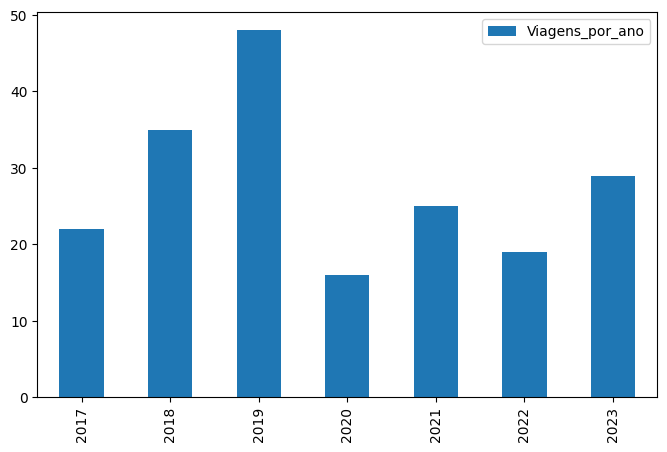

In [51]:
fig = ano_viagens[["Viagens_por_ano"]].plot(figsize=(8,5), kind='bar')
fig.set_xticklabels(ano_viagens["Ano"])
